# Model Evaluation

**We evaluate our calcification project with the following metrics:**

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


## Import required libraries

In [19]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score

## Load Trained Model and Test Data

In [8]:
# Load the trained model
model = joblib.load('../models/Trained_Models/best_log_reg_model.pkl')

# Load the test data
X_test = pd.read_csv('../Data/Processed_Data/X_test.csv')
y_test = pd.read_csv('../Data/Processed_Data/y_test.csv')

## Make Predictions

In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

## Calculate Accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


## Generate Confusion Matrix

In [11]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[25  4]
 [ 5 27]]


## Display Classification Report

In [21]:
# Display classification report
class_names = ['no heart disease', 'heart disease']  
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
                  precision    recall  f1-score   support

no heart disease       0.83      0.86      0.85        29
   heart disease       0.87      0.84      0.86        32

        accuracy                           0.85        61
       macro avg       0.85      0.85      0.85        61
    weighted avg       0.85      0.85      0.85        61



## Visualizations 

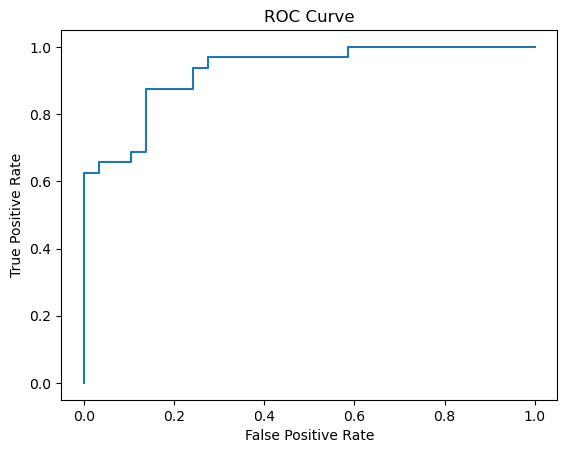

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# Example ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()